In [ ]:
!gdown --id 1TC3pnVu6cEWjugaXjV7JoOJltHn6Kc6w

Downloading...
From: https://drive.google.com/uc?id=1TC3pnVu6cEWjugaXjV7JoOJltHn6Kc6w
To: /content/archive (1).zip
363MB [00:02, 142MB/s]


In [ ]:

!unzip '/content/archive (1)'.zip


Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen= ImageDataGenerator(rescale=1/255,rotation_range=20,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2)

In [ ]:
import pandas as pd

In [ ]:
train =train_datagen.flow_from_directory(r'seg_train/seg_train',target_size=(150,150))

Found 14034 images belonging to 6 classes.


In [ ]:
train.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
test_datagen =ImageDataGenerator(rescale=1/255)

In [ ]:
test=test_datagen.flow_from_directory(r'seg_test/seg_test',target_size=(150,150))

Found 3000 images belonging to 6 classes.


In [ ]:
pred_datagen =ImageDataGenerator(rescale=1/255)
pred=pred_datagen.flow_from_directory(r'seg_pred',target_size=(150,150),class_mode='categorical')

Found 7301 images belonging to 1 classes.


In [ ]:
import os

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 9.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78935 sha256=f8fef431f3983da951f4f9110924b33e1ea8dd7703ecc7f8becf64ef5674e35c
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=5c7fb356b96edab364ad9710706ec486e32c1b1e294dd15818eca6330913dcf6
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from keras.layers import Dense,Flatten,Input

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
vgg=VGG19(input_shape=[150,150,3],weights='imagenet',include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
for layers in vgg.layers:
  layers.trainable=False

In [ ]:
x=Flatten()(vgg.output)

In [ ]:
pred=Dense(units=6,activation='softmax')(x)

In [ ]:
from keras.models import Model

In [ ]:
model=Model(inputs=vgg.input,outputs=pred)

In [ ]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
model.fit(train,validation_data=test,epochs=10,verbose=1,batch_size=32)

Epoch 1/10
439/439 [==============================] - 89s 200ms/step - loss: 0.8302 - accuracy: 0.6859 - val_loss: 0.4047 - val_accuracy: 0.8533
Epoch 2/10
439/439 [==============================] - 83s 190ms/step - loss: 0.4994 - accuracy: 0.8142 - val_loss: 0.4145 - val_accuracy: 0.8530
Epoch 3/10
439/439 [==============================] - 83s 189ms/step - loss: 0.4818 - accuracy: 0.8180 - val_loss: 0.4180 - val_accuracy: 0.8570
Epoch 4/10
439/439 [==============================] - 83s 190ms/step - loss: 0.4772 - accuracy: 0.8280 - val_loss: 0.4253 - val_accuracy: 0.8527
Epoch 5/10
439/439 [==============================] - 83s 189ms/step - loss: 0.4530 - accuracy: 0.8339 - val_loss: 0.4464 - val_accuracy: 0.8360
Epoch 6/10
439/439 [==============================] - 85s 194ms/step - loss: 0.4226 - accuracy: 0.8463 - val_loss: 0.3648 - val_accuracy: 0.8663
Epoch 7/10
439/439 [==============================] - 83s 189ms/step - loss: 0.4330 - accuracy: 0.8434 - val_loss: 0.4240 - val_ac

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

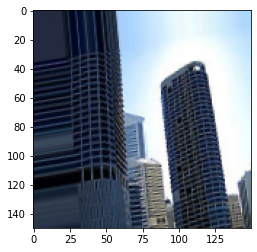

In [ ]:
plt.imshow(train[0][0][0])

In [ ]:
train[0][0][0].shape

(150, 150, 3)

In [ ]:
import numpy as np

In [ ]:
predictions=np.argmax(pre)

In [2]:
pre_class=[np.argmax(x) for x in pre]


In [ ]:
pre_class[3]

5